# Machine Learning May Major Project    - M V Pavan Kumar
### Sentimental Analysis of Restaurant Reviews

In this project I analysed sentiments of Restaurant Reviews i.e., whether the review is positive or negative.
There are two features - ‘review’ - the sentence and ‘sentiment’ - the label for the
review. 1 means positive review and 0 means negative review.

### Importing all the required packages for this project

In [1]:
import pandas as pd
import matplotlib.pyplot as pt
%matplotlib inline
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
import joblib
import streamlit as st

Loading the dataset

In [2]:
df = pd.read_csv('/content/Restaurant_Reviews.tsv', sep = '\t')

In [3]:
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


Dividing the dataset as positive and negative sets for the visualisation 

In [4]:
class group:
    def __init__(self, df):
        self.df = df
    def df_div(self, senti):    # for the dataset division
        l = self.df
        return l[l['Liked'] == senti]
    def df_cou(self, senti):     # counting the dataset division
        return self.df_div(senti).count()

In [5]:
grp_df = group(df)    # creating the object with the dataset

Positively(1) reviewed dataset

In [6]:
df_p = grp_df.df_div(1)
df_p.head()

,Review,Liked
0,Wow... Loved this place.,1
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
8,The fries were great too.,1
9,A great touch.,1


Negatively(0) reviewed dataset

In [7]:
df_n = grp_df.df_div(0)
df_n.head()

,Review,Liked
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
5,Now I am getting angry and I want my damn pho.,0
6,Honeslty it didn't taste THAT fresh.),0
7,The potatoes were like rubber and you could te...,0


No. of positive and negative datasets that are there

In [8]:
grp_df.df_cou(1), grp_df.df_cou(0)

(Review    500
 Liked     500
 dtype: int64,
 Review    500
 Liked     500
 dtype: int64)

### Visualisation of positive and negative reviews of the given dataset

In [9]:
c = {'Postive': 500, 'Negative': 500}
Sentiment = list(c.keys())
val = list(c.values())

<BarContainer object of 2 artists>

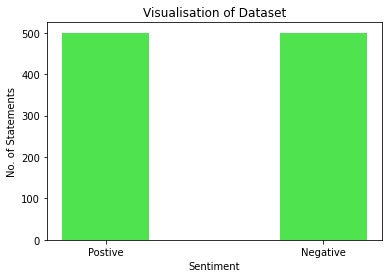

In [10]:
pt.xlabel('Sentiment')
pt.ylabel('No. of Statements')
pt.title('Visualisation of Dataset')
pt.bar(Sentiment, val, width = 0.4, color = '#4FE34F')

### Splitting the dataset for training(80%) and testing (20%)

In [46]:
x_train, x_test, y_train, y_test = train_test_split(df.Review, df.Liked, test_size = 0.2)

In [12]:
x_train.shape

(800,)

### Vectorizing the data that has been split

Here calling the vectorizer with stop words for the removal of the unwanted words in the Review column

In [47]:
vect = CountVectorizer(stop_words = 'english')
x_train_vec = vect.fit_transform(x_train)
x_test_vec = vect.transform(x_test)

In [48]:
x_vec = vect.fit_transform(df.Review)

In [49]:
x_test_vec

<200x1618 sparse matrix of type '<class 'numpy.int64'>'
	with 692 stored elements in Compressed Sparse Row format>

In [50]:
x_train_vec.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [51]:
a = x_vec.toarray()
a

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

### Creating a data frame which the words that were repeated 

In [52]:
df1 = pd.DataFrame(a, columns = vect.get_feature_names())
df1

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,00,10,100,11,12,15,17,1979,20,2007,...,year,years,yellow,yellowtail,yelpers,yucky,yukon,yum,yummy,zero
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Columns: 1820 entries, 00 to zero
dtypes: int64(1820)
memory usage: 13.9 MB


In [54]:
df1.describe().head()

,00,10,100,11,12,15,17,1979,20,2007,...,year,years,yellow,yellowtail,yelpers,yucky,yukon,yum,yummy,zero
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.001000,0.005000,0.002000,0.001000,0.002000,0.001000,0.001000,0.001000,0.004000,0.001000,...,0.002000,0.003000,0.001000,0.001000,0.001000,0.001000,0.001000,0.002000,0.004000,0.005000
std,0.031623,0.070569,0.044699,0.031623,0.044699,0.031623,0.031623,0.031623,0.063151,0.031623,...,0.044699,0.054717,0.031623,0.031623,0.031623,0.031623,0.031623,0.063246,0.063151,0.083558
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


### Creating the model by using different Algorithms 

Support Vector Machine Algorithm Model

In [55]:
model1 = SVC()

In [56]:
df.Review

0                               Wow... Loved this place.
1                                     Crust is not good.
2              Not tasty and the texture was just nasty.
3      Stopped by during the late May bank holiday of...
4      The selection on the menu was great and so wer...
                             ...                        
995    I think food should have flavor and texture an...
996                             Appetite instantly gone.
997    Overall I was not impressed and would not go b...
998    The whole experience was underwhelming, and I ...
999    Then, as if I hadn't wasted enough of my life ...
Name: Review, Length: 1000, dtype: object

In [57]:
model1.fit(x_train_vec, y_train)    # training the model 

SVC()

In [58]:
model1.score(x_test_vec, y_test)    # accuracy of the model

0.815

Logistic Regression Model

In [59]:
model2 = LogisticRegression()

In [60]:
model2.fit(x_train_vec, y_train)

LogisticRegression()

In [61]:
model2.score(x_test_vec, y_test)

0.84

In [62]:
def pred(mod, st):
    stv = vect.transform([st])
    return mod.predict(stv)

 Making the pipeline with Count Vectorizer and SVC algorithm

In [63]:
model3 = make_pipeline(CountVectorizer(), SVC())
model3.fit(x_train, y_train)

Pipeline(steps=[('countvectorizer', CountVectorizer()), ('svc', SVC())])

In [64]:
model3.score(x_test, y_test)

0.785

In [66]:
model3.predict(['not happy with the service'])    # checking the output with one sample

array([0])

Naive Bayes Model

In [67]:
model4 = MultinomialNB()

In [68]:
model4.fit(x_train_vec, y_train)

MultinomialNB()

In [69]:
model4.score(x_test_vec, y_test)

0.83

Making the pipeline with Count Vectorizer and Naive Bayes 

In [70]:
model5 = make_pipeline(CountVectorizer(), MultinomialNB())
model5.fit(x_test, y_test)

Pipeline(steps=[('countvectorizer', CountVectorizer()),
                ('multinomialnb', MultinomialNB())])

In [71]:
model5.score(x_test, y_test)

0.975

In [72]:
model5.predict(["I didn't like the food"])    # Testing the model with one input

array([0])

### Accuracy of different models
<br> Logistic Regression  - 84.0% 
<br> SVM                  - 81.5%
<br> SVM Pipeline         - 78.5%
<br> Naive Bayes          - 83.0%
<br> Naive Bayes Pipeline - 97.5%

In [39]:
joblib.dump(model5, 'Verzeo_Major_Prj_Model')

['Verzeo_Major_Prj_Model']

In [40]:
tm = joblib.load('Verzeo_Major_Prj_Model')
tm

Pipeline(steps=[('countvectorizer', CountVectorizer()),
                ('multinomialnb', MultinomialNB())])

In [41]:
tm.predict(['Food was awesome'])

array([1])

In [42]:
pip install streamlit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [43]:
%%writefile app.py
import joblib as jl 
md = jl.load('/content/Verzeo_Major_Prj_Model')

io = st.text_input('Enter the review')
op = jl.predict([io])
def out(i_o):
    if i_o == 0:
        return 'Negative Review'
    return 'Positive Review'

st.write(out(op))

Writing app.py


In [45]:
!streamlit run app.py & npx localtunnel --port 8000

2022-07-14 12:57:12.828 INFO    numexpr.utils: NumExpr defaulting to 2 threads.
npx: installed 22 in 2.259s
your url is: https://eighty-states-design-35-233-128-76.loca.lt

  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.2:8501
  External URL: http://35.233.128.76:8501

  Stopping...
^C


**Streamlit app Runnning on PyCharm**
<br> Downloaded the app.py and ran in PyCharm. Which is successfully completed.

**Sentimental Analysis:**

*   Sentiment analysis is contextual mining of text which identifies and extracts subjective information in source material, and helping a business to understand the social sentiment of their brand, product or service while monitoring online conversations.
*   It is simply analysing a statement whether it is positive/negative/neutral statement. 
* In sentimental analysis we need to tokenisation, vectorisation and fitting the data into a model for the prediction.
* Tokenisation is changing the words in to small letter words, removing keys like #,$,% etc., and etc.,
* Vectorisation is removing the bag of words from the statements. And caluclating how many number of times words have been repeated in a sentence.
* At finally, choosing the best algorithm for the prediction.


**Twitter Sentimental Analysis:**




*   Twitter Sentimental Analysis is similar to the Sentimental Analysis as mentioned above. But thee data is from the twitter that is tweeted by people.
*   Sentiment Analysis is a technique used in text mining.
* Twitter sentiment or opinion expressed through it may be positive, negative or neutral.
* However, no algorithm can give you 100% accuracy or prediction on sentiment analysis.
* As a part of Natural Language Processing, algorithms like SVM, Naive Bayes is used in predicting the polarity of the sentence.
* Sentiment analysis of Twitter data may also depend upon sentence level and document level.
* Methods like, positive and negative words to find on the sentence is however inappropriate, because the flavor of the text block depends a lot on the context. This may be done by looking at the POS (Part of Speech) Tagging.

The given project has been completed successfully.